In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
import datetime as dt
font={
    'size':20
}
sns.set(style="white", color_codes=True)

In [2]:
data = pd.read_csv(r"C:\Users\Me\Desktop\ProjectSem7\data\original.csv")

In [3]:
data.head()


,index,stop points,type,time,latitude,longitude,accuracy (m),altitude (m),speed (m/s),bearing (deg),sat_used,sat_inview
0,1,0,T,11/15/2018 2:58,30.290471,78.102949,5,599,0.25,14.0,25,33
1,2,0,T,11/15/2018 2:58,30.290468,78.102947,5,601,0.00,NaN,25,33
2,3,0,T,11/15/2018 2:58,30.290469,78.102945,5,601,0.00,NaN,26,33
3,4,0,T,11/15/2018 2:58,30.290469,78.102941,5,601,0.00,NaN,26,33
4,5,0,T,11/15/2018 2:58,30.290470,78.102938,5,601,0.00,NaN,26,33


In [11]:
df = pd.DataFrame({
...    'speed': data['speed (m/s)']
...    }, index=data['index'])

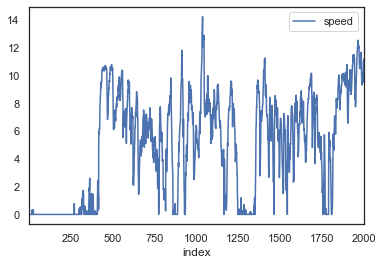

In [12]:
lines = df.plot.line()

In [13]:
import math


class DualSlidingWindow:
    def __init__(self, window_size,file, data, threshold):
        self.window_size = window_size
        self.file = file
        self.data = data
        self.anchor = list()
        self.threshold = threshold
        self.data_len = len(data)
        self.avg_mal_dis = 0
        
    def mahalonobis_distance(self, mean1, mean2, var1, var2):
        if(mean1-mean2 == 0 and (var1 == 0 or var2 == 0)):
            return np.nan
        elif (var1 == 0 or var2 == 0) and (mean1-mean2) !=0:
            return np.inf
        return (float(mean1-mean2)**2)*((1/(2*var1))+(1/(2*var2)))
    
    def sliding_window(self):
        i= 0
        avg_mal_distance = list()
        j= i + self.window_size
        k= j + self.window_size
        mahalonobis_dis = 0
        while k<len(self.data):
            w1 = self.data[i:j]
            w2 = self.data[j:k]
            try:
                mahalonobis_dis = self.mahalonobis_distance(np.mean(w1), np.mean(w2), np.var(w1), np.var(w2))
#                 print(w1,w2,mahalonobis_dis)
            except:
                print("")

            if math.isinf(mahalonobis_dis):
                i+=1
                j+=1
                k+=1
            elif math.isnan(mahalonobis_dis):
                i+=1
                j+=1
                k+=1
            elif mahalonobis_dis > self.threshold:
                self.anchor.append(j)
                i+=self.window_size
                j+=self.window_size
                k+=self.window_size
                avg_mal_distance.append(mahalonobis_dis)
            else:
                i+=1
                j+=1
                k+=1
                avg_mal_distance.append(mahalonobis_dis)
            
        self.avg_mal_dis = sum(avg_mal_distance)/len(self.data)
        print(self.avg_mal_dis)
    
    
        
                
    def plotting(self):
        plt.figure(figsize=(30,15))
        i= 0 
        while i<len(self.anchor)-2:
            x = self.file.loc[self.anchor[i]:self.anchor[i+1],]
            plt.plot(x.index, x["speed"], linewidth=2)
#             print(x)
            i = i + 1
        st = "At " + str(self.threshold)
    
    def get_anchor(self):
        return self.anchor

0.41848965568022034


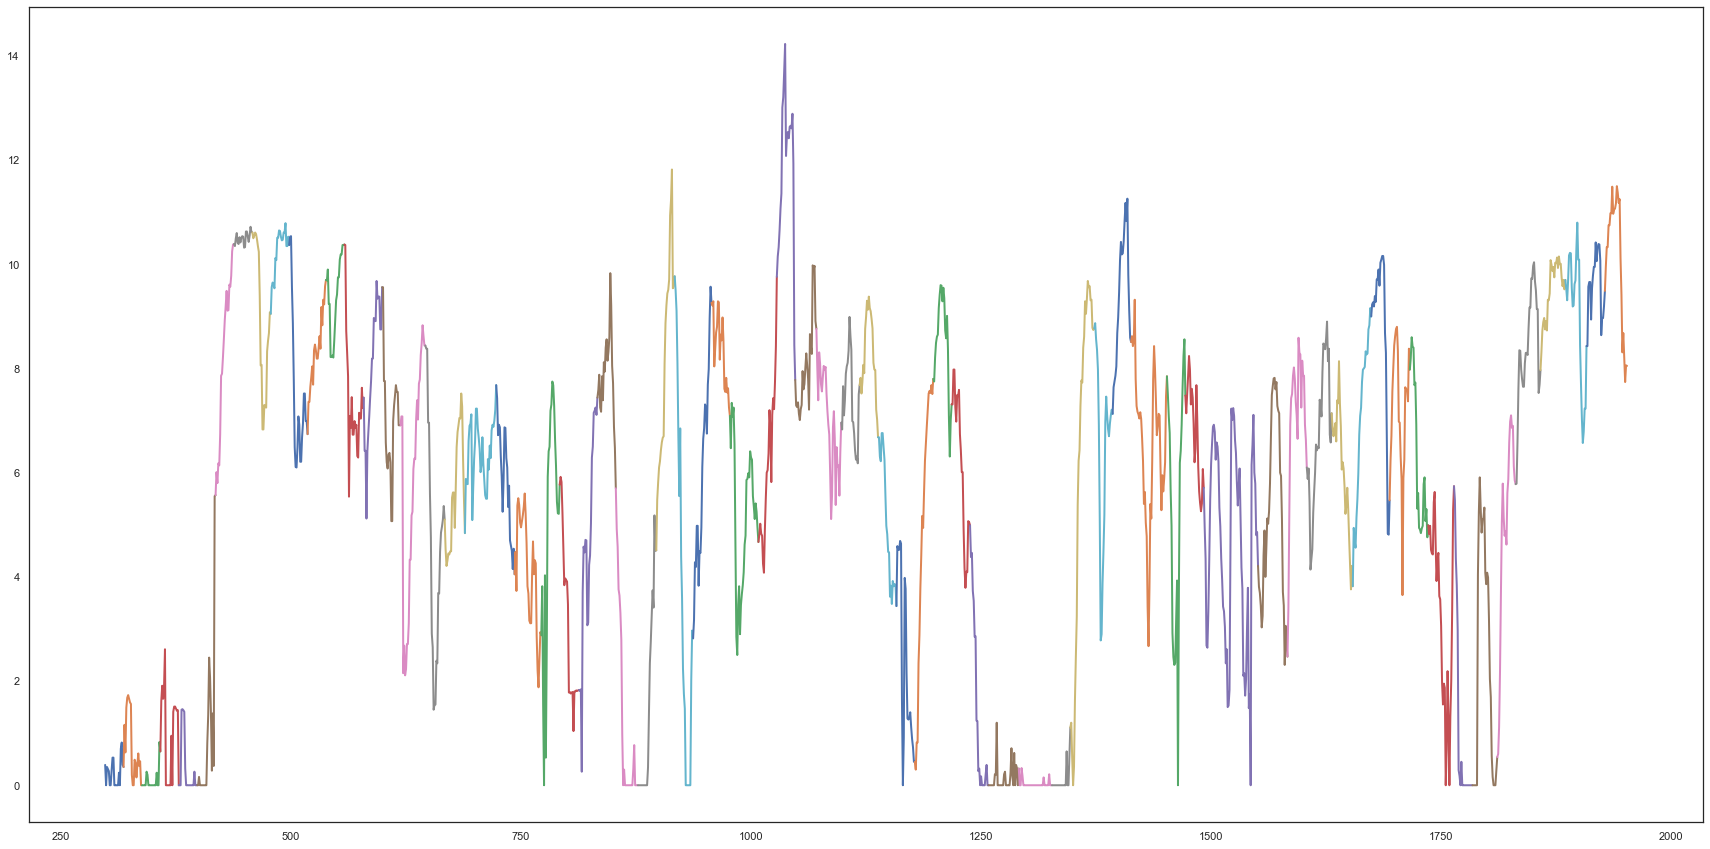

In [14]:
s = DualSlidingWindow(20,df, df['speed'],0.7895)
s.sliding_window()
s.plotting()

In [15]:
# 0/0.0

In [16]:
# 0.0/0

In [30]:
import random
fp = r"C:\Users\Me\Desktop\ProjectSem7\data\original.csv"
df = pd.read_csv(fp)

gdf_traffic = gpd.GeoDataFrame(
    df [["latitude","longitude", "speed (m/s)"]])
new_geo = gpd.GeoDataFrame()
new_geo['latitude']=gdf_traffic['latitude'].astype('float64')
new_geo['longitude']=gdf_traffic['longitude'].astype('float64')

location = new_geo['latitude'].mean(), new_geo['longitude'].mean()


locationlist = new_geo[['latitude','longitude']].values.tolist()

m = folium.Map(location=location, zoom_start=12)

color = ["red","blue","purple"]
anchors = s.get_anchor()
for i in range(1,len(anchors)-2):
    folium.PolyLine(locations = locationlist[anchors[i-1]:anchors[i]], 
                    color=random.choice(color),line_opacity = 1).add_to(m) 
# folium.PolyLine(locations = locationlist[1000:1500], 
#                 color=random.choice(color),line_opacity = 1).add_to(m) 
m.save(outfile= "gpsplot.html")
m

(2000, 2)

,latitude,longitude
0,30.290471,78.102949
1,30.290468,78.102947
2,30.290469,78.102945
3,30.290469,78.102941
4,30.290470,78.102938


In [179]:
locationlist = new_geo[['latitude','longitude']].values.tolist()
# labels = "CITY => "+ gdf_traffic['twp']+"\n"+gdf_traffic['title']

m = folium.Map(location=location, zoom_start=15)


# for point in range(0,new_geo.shape[0]): 
# #     popup = folium.Popup(labels[point], parse_html=True)
#     icon = folium.Icon(color='orange')
#     folium.Marker(locationlist[point], icon=icon).add_to(m)
for i in 
folium.PolyLine(locations = locationlist, 
                line_opacity = 0.5).add_to(m) 
    
m.save(outfile= "gpsplot.html")
m